# Fundamentals of Data Analysis Project

---

**Author: Damien Farrell**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import jupyter_black

jupyter_black.load()
sns.set_theme()

## Introduction

The [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris), accessible through the UCI Machine Learning Repository, is part of a vast array of databases utilised by the machine learning community to conduct evaluations of machine learning algorithms. 

The Iris dataset is frequently employed in pattern recognition learning. This multivariate dataset's default machine learning task is classification. It contains 150 instances with five attributes, four of which represent sepal and petal measurements for each data point, while the fifth attribute indicates the class or species of Iris plant to which each data point belongs. 

The dataset encompasses 50 plants from each of the three Iris plant classes, with each class representing a distinct species: Iris Setosa, Iris Versicolor, and Iris Virginica. It was originally created by R.A. Fisher in 1936 and was donated by Michael Marshall in 1988.

<p float="left">
    <img src="./img/Iris_Versicolor.jpg" width="20%" height="20%">
    <img src="./img/Iris_Virginica.jpg" width="20%" height="20%">
    <img src="./img/Iris_Setosa.jpg" width="40%" height="40%">
</p>

In [2]:
url_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_headers = [
    "Sepal_Length",
    "Sepal_Width",
    "Petal_Length",
    "Petal_Width",
    "Class",
]

df = pd.read_csv(url_name, header=None, names=column_headers)

In [3]:
# Convert the class labels to numerical format
df["Class_Int"] = df["Class"].copy()  # Make a copy of the class column to later encode

le = LabelEncoder()
df["Class_Int"] = le.fit_transform(df["Class"])

df = df[
    ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class_Int", "Class"]
]

In [4]:
summary_data = df.describe()
summary_data

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class_Int
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df_stats = df.groupby(["Class"]).agg(["mean", "max", "min"])
df_stats

Sepal_Length           Sepal_Width           Petal_Length  \
                        mean  max  min        mean  max  min         mean   
Class                                                                       
Iris-setosa            5.006  5.8  4.3       3.418  4.4  2.3        1.464   
Iris-versicolor        5.936  7.0  4.9       2.770  3.4  2.0        4.260   
Iris-virginica         6.588  7.9  4.9       2.974  3.8  2.2        5.552   

                          Petal_Width           Class_Int          
                 max  min        mean  max  min      mean max min  
Class                                                              
Iris-setosa      1.9  1.0       0.244  0.6  0.1       0.0   0   0  
Iris-versicolor  5.1  3.0       1.326  1.8  1.0       1.0   1   1  
Iris-virginica   6.9  4.5       2.026  2.5  1.4       2.0   2   2

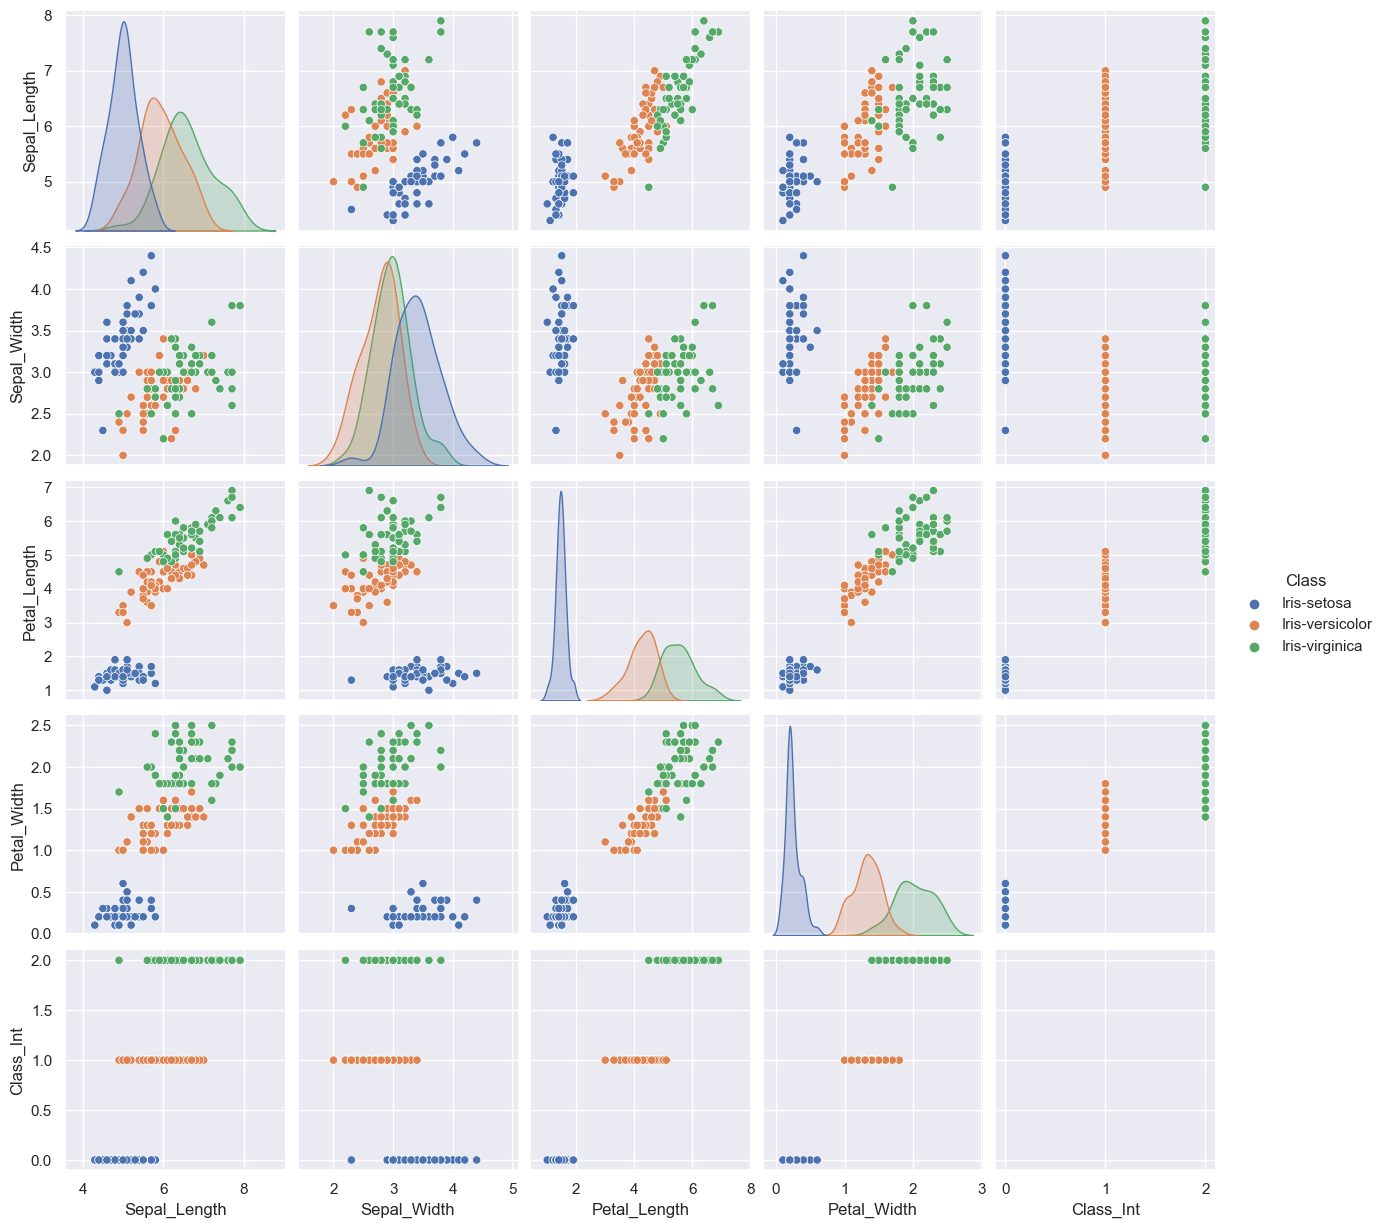

In [11]:
sns.pairplot(df, vars=df.columns[:-1], hue="Class");

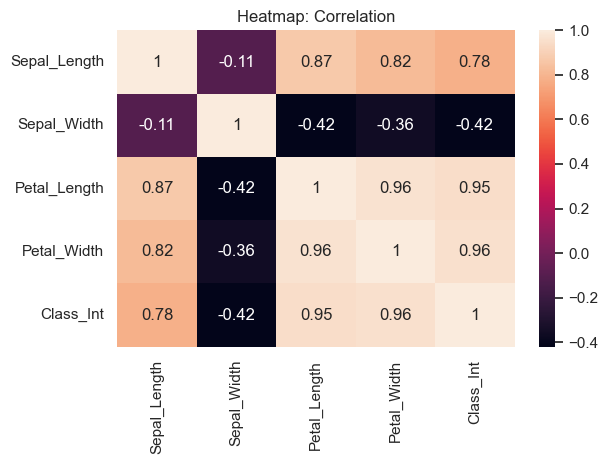

In [7]:
df_corr = df[
    ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Class_Int"]
].corr()
sns.heatmap(df_corr, annot=True)
plt.title("Heatmap: Correlation")
plt.tight_layout()

## **Model**

In [8]:
# Model:
# Separate features and labels
x = df[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]]
y = df["Class_Int"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

# Evaluate the model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



---

# End